<a href="https://colab.research.google.com/github/Thokhir/Module-wise-list-of-python-code-at-one-place/blob/main/PHVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0     0.559588
1     0.149010
2     0.162887
3     0.423402
4     0.338702
5     0.205052
6     0.146530
7     0.296899
8     0.563604
9     0.075784
10    0.083179
11    0.040742
Name: PHVI, dtype: float64
0.25378155943356057
   scode                             location source      PHVI
0     S1                      River Upputerua  Canal  0.559588
1     S2              Venkayya Vayyeru canalb  Canal  0.149010
2     S5                          Undi Canalb  Canal  0.162887
3     S6                          Undi Canalc  Canal  0.423402
4     S7                          Bank Canalc  Canal  0.338702
5    S12                    Narsapuram Canalb  Canal  0.205052
6    S14                   Veeravasaram canal  Canal  0.146530
7    S19  Upputeru river confluence criticalc  Canal  0.296899
8    S20  Old yanamaduru upputeru confluencec  Canal  0.563604
9    S26              Venkayya Vayyeru canalb  Canal  0.075784
10   S27                         Eluru canala  Canal  0.083179
11   S29    Gosta

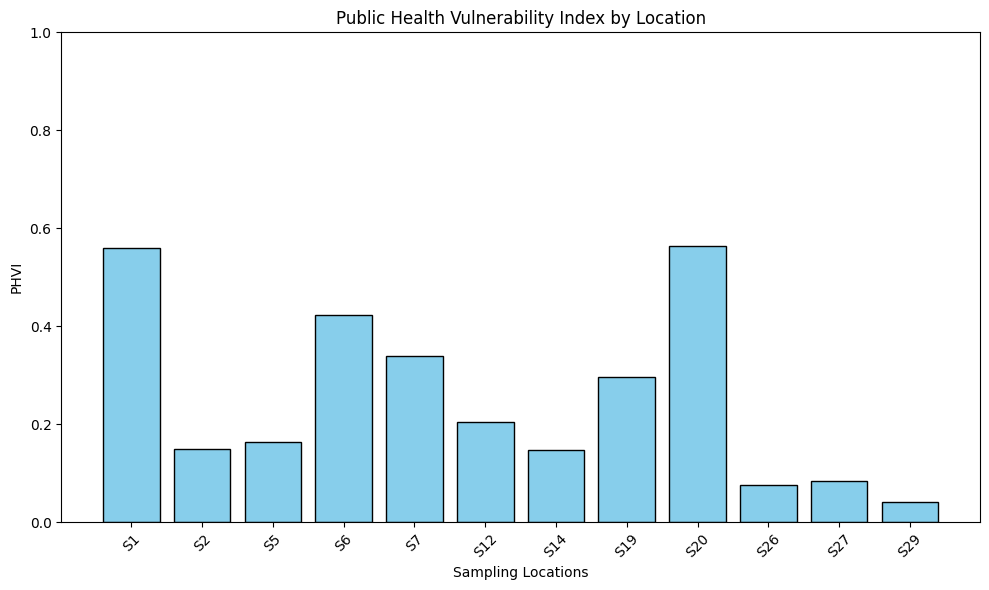

<ipython-input-28-5a792bab8c44>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phvi_values', y='Locations', data=plot_df, palette='Blues_d')


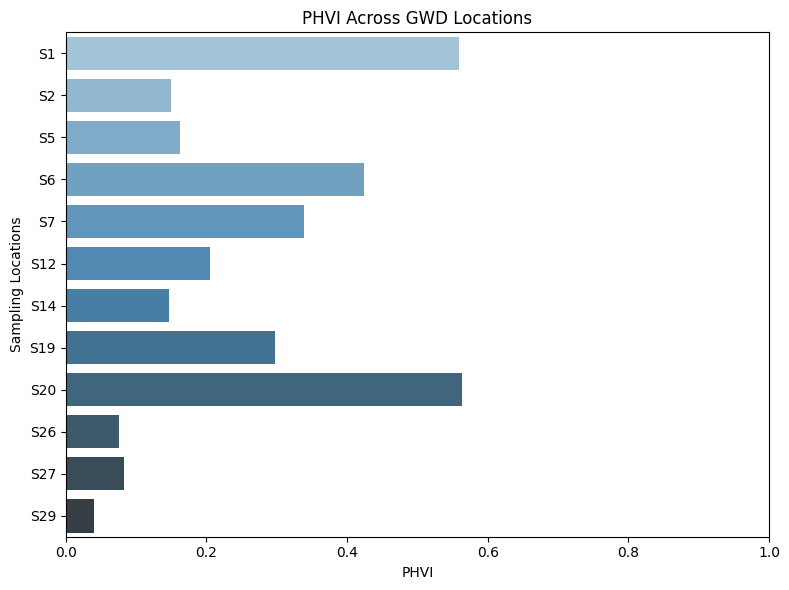

In [28]:
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt


# Load data (replace with your CSV/shapefile)
df_physicalc = pd.read_csv('/content/PHVI/physicalnorm.csv')  # Columns: 'colour', 'ph', 'turbidity', 'salinity'
df_chemicalc = pd.read_csv('/content/PHVI/chemicalnormc.csv')  # Columns: 'tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates'
df_microbialc = pd.read_csv('/content/PHVI/microbialnormc.csv')  # Columns: 'mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl'

# Normalize physical data
for col in ['colour', 'ph', 'turbidity', 'salinity']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_physicalc[col] = pd.to_numeric(df_physicalc[col], errors='coerce')
    df_physicalc[col + '_norm'] = (df_physicalc[col] - df_physicalc[col].min()) / (df_physicalc[col].max() - df_physicalc[col].min())
# Calculate physical_norm
df_physicalc['physical_norm'] = df_physicalc[['colour_norm', 'ph_norm', 'turbidity_norm', 'salinity_norm']].mean(axis=1)

# Normalize chemical data
for col in ['tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_chemicalc[col] = pd.to_numeric(df_chemicalc[col], errors='coerce')
    df_chemicalc[col + '_norm'] = (df_chemicalc[col] - df_chemicalc[col].min()) / (df_chemicalc[col].max() - df_chemicalc[col].min())
# Calculate chemicalc_norm
df_chemicalc['chemicalc_norm'] = df_chemicalc[['tds_norm', 'ammonia_norm', 'nitrate_norm', 'nitrite_norm', 'sulphates_norm', 'ta_norm', 'th_norm', 'cah_norm', 'mgh_norm', 'chlorides_norm', 'phosphates_norm']].mean(axis=1)

# Normalize microbial data
for col in ['mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_microbialc[col] = pd.to_numeric(df_microbialc[col], errors='coerce')
    df_microbialc[col + '_norm'] = (df_microbialc[col] - df_microbialc[col].min()) / (df_microbialc[col].max() - df_microbialc[col].min())
# Calculate microbialc_norm
df_microbialc['microbialc_norm'] = df_microbialc[['mpn_norm', 'vp_norm', 'ef_norm', 'vc_norm', 'ps_norm', 'sa_norm', 'ec_norm', 'kl_norm']].mean(axis=1)

# Merge the DataFrames
# Assuming all DataFrames have a common index or column to merge on
df = pd.concat([df_physicalc[['physical_norm']], df_chemicalc[['chemicalc_norm']], df_microbialc[['microbialc_norm']]], axis=1)

# Calculate PHVI
df['PHVI'] = (0.4 * df['microbialc_norm']) + (0.3 * df['chemicalc_norm']) + (0.3 * df['physical_norm'])
print(df['PHVI'])
print(df['PHVI'].mean())

# Assuming all DataFrames have matching scode for merging
#Removed the extra indentation from this line
df_combined = pd.merge(df_physicalc[['scode', 'location', 'source']], df[['PHVI']], left_index=True, right_index=True)

# Display the combined table
print(df_combined)

import matplotlib.pyplot as plt

locations = df_physicalc['scode'].tolist()
phvi_values = df['PHVI'].tolist()
plt.figure(figsize=(10, 6))
plt.bar(locations, phvi_values, color='skyblue', edgecolor='black')
plt.xlabel('Sampling Locations')
plt.ylabel('PHVI')
plt.title('Public Health Vulnerability Index by Location')
plt.ylim(0, 1)  # PHVI range: 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
plot_df = pd.DataFrame({'Locations': df_physicalc['scode'], 'phvi_values': df['PHVI']})
plt.figure(figsize=(8, 6))
sns.barplot(x='phvi_values', y='Locations', data=plot_df, palette='Blues_d')
plt.xlabel('PHVI')
plt.ylabel('Sampling Locations')
plt.title('PHVI Across GWD Locations')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# New Section

0     0.720122
1     0.200245
2     0.462442
3     0.718763
4     0.360826
5     0.279166
6     0.284638
7     0.309031
8     0.216268
9     0.147229
10    0.087350
11    0.365913
12    0.505263
Name: PHVI, dtype: float64
0.3582504315041862
   scode                  location source      PHVI
0     S3       Rudraya codu Drainb  Drain  0.720122
1     S4            Bondada drainb  Drain  0.200245
2    S10            Nakkala drainc  Drain  0.462442
3    S11               Kaja drainb  Drain  0.718763
4    S13        Baggeswaram drainb  Drain  0.360826
5    S16           Gontheru drainc  Drain  0.279166
6    S17   Yenamaduru confluencec   Drain  0.284638
7    S21            Rayalam Drainc  Drain  0.309031
8    S22            Bondada drainb  Drain  0.216268
9    S24            Rayalam Drainc  Drain  0.147229
10   S25  Rayalam Drainc cosmoclub  Drain  0.087350
11   S28         Yanamaduru draina  Drain  0.365913
12   S30         Yanamaduru drainb  Drain  0.505263


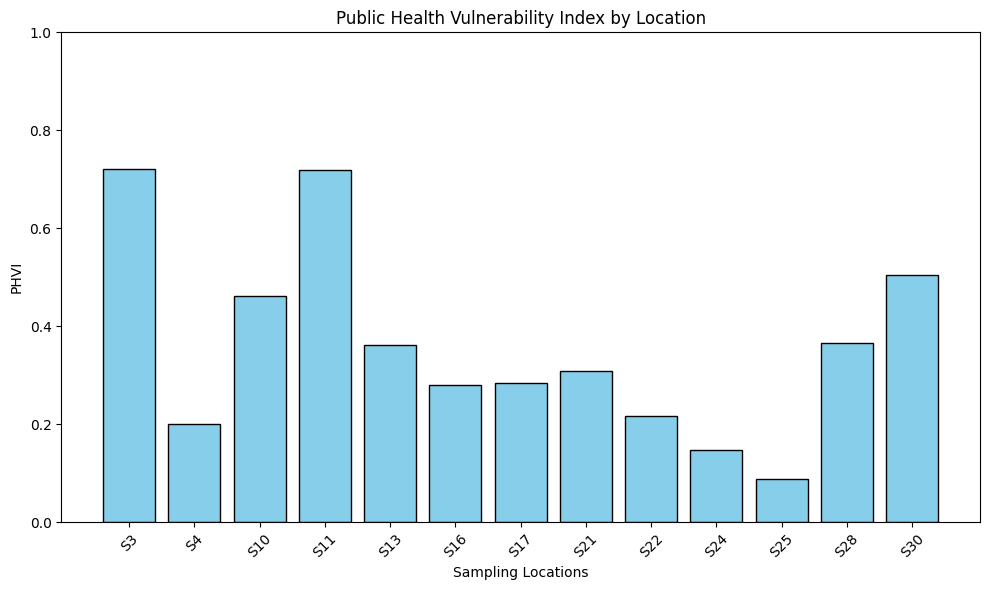

<ipython-input-30-5a9a5245b161>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='phvi_values', y='Locations', data=plot_dfd, palette='Blues_d')


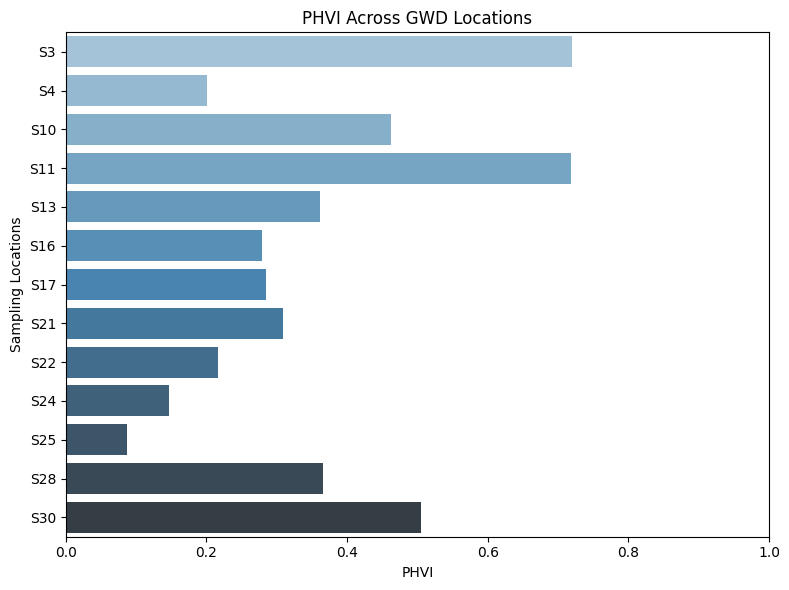

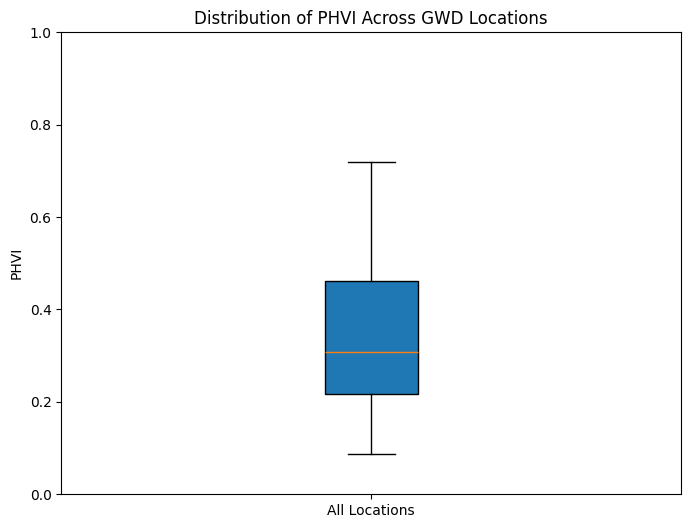

In [30]:
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt


# Load data (replace with your CSV/shapefile)
df_physicald = pd.read_csv('/content/PHVI/physicalnormd.csv')  # Columns: 'colour', 'ph', 'turbidity', 'salinity'
df_chemicald = pd.read_csv('/content/PHVI/chemicalnormd.csv')  # Columns: 'tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates'
df_microbiald = pd.read_csv('/content/PHVI/microbialnormd.csv')  # Columns: 'mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl'

# Normalize physical data
for col in ['colour', 'ph', 'turbidity', 'salinity']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_physicald[col] = pd.to_numeric(df_physicald[col], errors='coerce')
    df_physicald[col + '_norm'] = (df_physicald[col] - df_physicald[col].min()) / (df_physicald[col].max() - df_physicald[col].min())
# Calculate physical_norm
df_physicald['physicald_norm'] = df_physicald[['colour_norm', 'ph_norm', 'turbidity_norm', 'salinity_norm']].mean(axis=1)

# Normalize chemical data
for col in ['tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_chemicald[col] = pd.to_numeric(df_chemicald[col], errors='coerce')
    df_chemicald[col + '_norm'] = (df_chemicald[col] - df_chemicald[col].min()) / (df_chemicald[col].max() - df_chemicald[col].min())
# Calculate chemicalc_norm
df_chemicald['chemicald_norm'] = df_chemicald[['tds_norm', 'ammonia_norm', 'nitrate_norm', 'nitrite_norm', 'sulphates_norm', 'ta_norm', 'th_norm', 'cah_norm', 'mgh_norm', 'chlorides_norm', 'phosphates_norm']].mean(axis=1)

# Normalize microbial data
for col in ['mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df_microbiald[col] = pd.to_numeric(df_microbiald[col], errors='coerce')
    df_microbiald[col + '_norm'] = (df_microbiald[col] - df_microbiald[col].min()) / (df_microbiald[col].max() - df_microbiald[col].min())
# Calculate microbialc_norm
df_microbiald['microbiald_norm'] = df_microbiald[['mpn_norm', 'vp_norm', 'ef_norm', 'vc_norm', 'ps_norm', 'sa_norm', 'ec_norm', 'kl_norm']].mean(axis=1)

# Merge the DataFrames
# Assuming all DataFrames have a common index or column to merge on
df = pd.concat([df_physicald[['physicald_norm']], df_chemicald[['chemicald_norm']], df_microbiald[['microbiald_norm']]], axis=1)

# Calculate PHVI
df['PHVI'] = (0.4 * df_microbiald['microbiald_norm']) + (0.3 * df_chemicald['chemicald_norm']) + (0.3 * df_physicald['physicald_norm'])
print(df['PHVI'])
print(df['PHVI'].mean())

df_combined = pd.merge(df_physicald[['scode', 'location', 'source']], df[['PHVI']], left_index=True, right_index=True)

# Display the combined table
print(df_combined)


import matplotlib.pyplot as plt

locations = df_physicald['scode'].tolist()
phvi_values = df['PHVI'].tolist()
plt.figure(figsize=(10, 6))
plt.bar(locations, phvi_values, color='skyblue', edgecolor='black')
plt.xlabel('Sampling Locations')
plt.ylabel('PHVI')
plt.title('Public Health Vulnerability Index by Location')
plt.ylim(0, 1)  # PHVI range: 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import seaborn as sns
import pandas as pd
plot_dfd = pd.DataFrame({'Locations': df_physicald['scode'], 'phvi_values': df['PHVI']})
plt.figure(figsize=(8, 6))
sns.barplot(x='phvi_values', y='Locations', data=plot_dfd, palette='Blues_d')
plt.xlabel('PHVI')
plt.ylabel('Sampling Locations')
plt.title('PHVI Across GWD Locations')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

#plt.figure(figsize=(8, 6))
#plt.boxplot(phvi_values, vert=True, patch_artist=True)
#plt.ylabel('PHVI')
#plt.title('Distribution of PHVI Across GWD Locations')
#plt.xticks([1], ['All Locations'])
#plt.ylim(0, 1)
#plt.show()

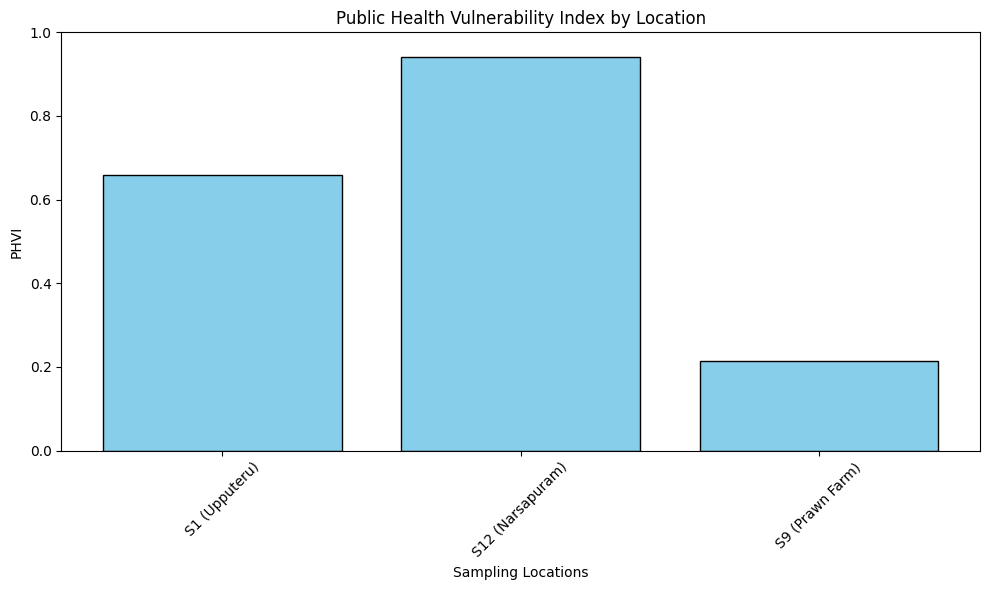

In [ ]:
import matplotlib.pyplot as plt

locations = ['S1 (Upputeru)', 'S12 (Narsapuram)', 'S9 (Prawn Farm)']
phvi_values = [0.658, 0.942, 0.213]

plt.figure(figsize=(10, 6))
plt.bar(locations, phvi_values, color='skyblue', edgecolor='black')
plt.xlabel('Sampling Locations')
plt.ylabel('PHVI')
plt.title('Public Health Vulnerability Index by Location')
plt.ylim(0, 1)  # PHVI range: 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Load data (replace with your CSV/shapefile)
df = pd.read_csv('physicalnormd.csv')  # Columns: 'colour', 'ph', 'turbidity', 'salinity'
#gdf = gpd.read_file('gwd_canals.shp')   # Spatial layer

# Normalize
for col in ['colour', 'ph', 'turbidity', 'salinity']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Calculate PHVI
df['physicald_norm'] = df[['colour_norm', 'ph_norm', 'turbidity_norm', 'salinity_norm']].mean(axis=1)
print(df['physicald_norm'])


0     0.534657
1     0.168557
2     0.186859
3     0.485479
4     0.643037
5     0.516383
6     0.484848
7     0.484848
8     0.487999
9     0.152775
10    0.167297
11    0.334594
12    0.005671
Name: physicald_norm, dtype: float64


In [ ]:
# Load data (replace with your CSV/shapefile)
df = pd.read_csv('chemicalnormc.csv')  # Columns: 'tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates'
#gdf = gpd.read_file('gwd_canals.shp')   # Spatial layer
# Normalize
for col in ['tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Calculate PHVI
# Changed 'cah_morm' to 'cah_norm'
df['chemicalc_norm'] = df[['tds_norm', 'ammonia_norm', 'nitrate_norm', 'nitrite_norm', 'sulphates_norm', 'ta_norm', 'th_norm', 'cah_norm', 'mgh_norm', 'chlorides_norm', 'phosphates_norm']].mean(axis=1)

print(df['chemicalc_norm'])

0     0.564157
1     0.337243
2     0.343564
3     0.125841
4     0.096009
5     0.312079
6     0.420193
7     0.707546
8     0.592967
9     0.151803
10    0.025273
11    0.075701
Name: chemicalc_norm, dtype: float64


In [ ]:
# Load data (replace with your CSV/shapefile)
df = pd.read_csv('chemicalnormd.csv')  # Columns: 'tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates'
#gdf = gpd.read_file('gwd_canals.shp')   # Spatial layer
# Normalize
for col in ['tds', 'ammonia', 'nitrate', 'nitrite', 'sulphates', 'ta', 'th', 'cah', 'mgh', 'chlorides', 'phosphates']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Calculate PHVI
# Changed 'cah_morm' to 'cah_norm'
df['chemicald_norm'] = df[['tds_norm', 'ammonia_norm', 'nitrate_norm', 'nitrite_norm', 'sulphates_norm', 'ta_norm', 'th_norm', 'cah_norm', 'mgh_norm', 'chlorides_norm', 'phosphates_norm']].mean(axis=1)

print(df['chemicald_norm'])

0     0.638304
1     0.491065
2     0.240217
3     0.648436
4     0.670475
5     0.543266
6     0.535157
7     0.616468
8     0.304892
9     0.326181
10    0.165695
11    0.053023
12    0.296623
Name: chemicald_norm, dtype: float64


In [ ]:
# Load data (replace with your CSV/shapefile)
df = pd.read_csv('microbialnormc.csv')  # Columns: 'mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl'
#gdf = gpd.read_file('gwd_canals.shp')   # Spatial layer
# Normalize
for col in ['mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Calculate PHVI
# Changed 'cah_morm' to 'cah_norm'
df['microbialc_norm'] = df[['mpn_norm', 'vp_norm', 'ef_norm', 'vc_norm', 'ps_norm', 'sa_norm', 'ec_norm', 'kl_norm']].mean(axis=1)

print(df['microbialc_norm'])

0     0.857143
1     0.000000
2     0.000000
3     0.714286
4     0.714286
5     0.000000
6     0.000000
7     0.000000
8     0.857143
9     0.000000
10    0.000000
11    0.000000
Name: microbialc_norm, dtype: float64


In [ ]:
# Load data (replace with your CSV/shapefile)
df = pd.read_csv('microbialnormd.csv')  # Columns: 'mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl'
#gdf = gpd.read_file('gwd_canals.shp')   # Spatial layer
# Normalize
for col in ['mpn', 'vp', 'ef', 'vc', 'ps', 'sa', 'ec', 'kl']:
    # Convert the column to numeric, handling errors by coercing to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Calculate PHVI
# Changed 'cah_morm' to 'cah_norm'
df['microbiald_norm'] = df[['mpn_norm', 'vp_norm', 'ef_norm', 'vc_norm', 'ps_norm', 'sa_norm', 'ec_norm', 'kl_norm']].mean(axis=1)

print(df['microbiald_norm'])

0     0.833333
1     0.000000
2     0.833333
3     1.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.686806
12    1.000000
Name: microbiald_norm, dtype: float64
